In [153]:
! git clone https://github.com/sebabecerra/DesafioLatam.git

Cloning into 'DesafioLatam'...


In [ ]:
!pip install Basemap

In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv ('/content/drive/MyDrive/Challenge - Data Scientist /dataset_SCL.csv')


##Desafio

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [3]:
print(df.columns)
print(df.dtypes)
df.tail()

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')
Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [4]:
#distribucion por Cia
xcia = df.groupby(['OPERA']).agg({'Fecha-O': 'count'})
xcia = xcia.rename({'Fecha-O': 'Numero de Vuelos'}, axis=1)
xcia['%'] =(xcia['Numero de Vuelos']/ xcia['Numero de Vuelos'].sum()) * 100
xcia.sort_values(by=['Numero de Vuelos'], inplace=True , ascending=False)
print(xcia)

                          Numero de Vuelos          %
OPERA                                                
Grupo LATAM                          40892  59.953670
Sky Airline                          14298  20.962965
Aerolineas Argentinas                 1949   2.857520
Copa Air                              1850   2.712371
Latin American Wings                  1674   2.454330
Avianca                               1152   1.689001
JetSmart SPA                          1095   1.605431
Gol Trans                              806   1.181714
American Airlines                      757   1.109873
Air Canada                             565   0.828373
Iberia                                 362   0.530745
Delta Air                              358   0.524881
Air France                             358   0.524881
Aeromexico                             351   0.514617
United Airlines                        335   0.491159
Oceanair Linhas Aereas                 279   0.409055
Alitalia                    

Llama la atencion que el 70% de los vuelos estan concetrados en el Grupo Latam y en Sky airline.

In [5]:
#distribucion por x dia de la semana
xdia = df.groupby(['DIANOM']).agg({'Fecha-O': 'count'})
xdia = xdia.rename({'Fecha-O': 'Dias'}, axis=1)
xdia['%'] =(xdia['Dias']/ xdia['Dias'].sum()) * 100
xdia.sort_values(by=['Dias'], inplace=True , ascending=False)
print(xdia)

            Dias          %
DIANOM                     
Viernes    10292  15.089582
Jueves     10251  15.029470
Lunes      10131  14.853532
Domingo     9796  14.362373
Miercoles   9722  14.253878
Martes      9662  14.165909
Sabado      8352  12.245257


In [6]:
#distribucion por x Origen
xorigen = df.groupby(['Ori-O']).agg({'Fecha-O': 'count'})
xorigen = xorigen.rename({'Fecha-O': 'Origen'}, axis=1)
xorigen['%'] =(xorigen['Origen']/ xorigen['Origen'].sum()) * 100
xorigen.sort_values(by=['Origen'], inplace=True , ascending=False)
print(xorigen)

       Origen      %
Ori-O               
SCEL    68206  100.0


In [7]:
#distribucion por x Destino
pd.set_option('max_rows', 99999)
xdestino = df.groupby(['Des-O']).agg({'Fecha-O': 'count'})
xdestino = xdestino.rename({'Fecha-O': 'Destino'}, axis=1)
xdestino['%'] =(xdestino['Destino']/ xdestino['Destino'].sum()) * 100
xdestino.sort_values(by=['Destino'], inplace=True , ascending=False)
print(xdestino)

       Destino         %
Des-O                   
SCFA      5786  8.483125
SPJC      5270  7.726593
SCCF      5146  7.544791
SCTE      4357  6.388001
SCIE      3993  5.854324
SCDA      3747  5.493652
SBGR      3569  5.232677
SAEZ      3241  4.751781
SABE      3094  4.536258
SCQP      2589  3.795854
SCAR      2436  3.571533
SCSE      2410  3.533413
SCCI      2105  3.086239
MPTO      1850  2.712371
SCAT      1780  2.609741
SAME      1625  2.382488
SKBO      1604  2.351699
SBGL      1435  2.103920
SUMU      1066  1.562912
SACO      1023  1.499868
KMIA      1016  1.489605
LEMD       894  1.310735
SCBA       839  1.230097
SCVD       753  1.104008
MMMX       700  1.026303
SCIP       452  0.662698
SEGU       422  0.618714
KJFK       382  0.560068
NZAA       361  0.529279
LFPG       359  0.526347
KATL       358  0.524881
KDFW       357  0.523414
KIAH       334  0.489693
CYYZ       283  0.414920
SCJO       259  0.379732
LIRF       259  0.379732
SCPQ       235  0.344544
SGAS       232  0.340146


In [8]:
#distribucion por x Anio
pd.set_option('max_rows', 99999)
xanio = df.groupby(['AÑO']).agg({'Fecha-O': 'count'})
xanio = xanio.rename({'Fecha-O': 'AÑOS'}, axis=1)
xanio['%'] =(xanio['AÑOS']/ xanio['AÑOS'].sum()) * 100
xanio.sort_values(by=['AÑOS'], inplace=True , ascending=False)
print(xanio)

       AÑOS          %
AÑO                   
2017  68204  99.997068
2018      2   0.002932


In [9]:
#distribucion por x meses
pd.set_option('max_rows', 99999)
xanio = df.groupby(['MES']).agg({'Fecha-O': 'count'})
xanio = xanio.rename({'Fecha-O': 'MESES'}, axis=1)
xanio['%'] =(xanio['MESES']/ xanio['MESES'].sum()) * 100
xanio.sort_values(by=['MESES'], inplace=True , ascending=False)
print(xanio)

     MESES         %
MES                 
12    6356  9.318828
1     6108  8.955224
11    6080  8.914172
10    6032  8.843797
7     5992  8.785151
8     5744  8.421546
9     5610  8.225083
2     5561  8.153242
3     5482  8.037416
5     5240  7.682609
4     5020  7.360056
6     4981  7.302877


In [10]:
#Format date
df['date'] = pd.to_datetime(df['Fecha-I']).dt.strftime('%Y-%m-%d')

In [11]:
#distribucion por x fecha
pd.set_option('max_rows', 9999999)
df['date'] = pd.to_datetime(df['Fecha-I']).dt.strftime('%Y-%m-%d')
xfecha = df.groupby(['date']).agg({'Fecha-O': 'count'})
xfecha = xfecha.rename({'Fecha-O': 'N_Vuelos'}, axis=1)
xfecha['%'] =(xfecha['N_Vuelos']/ xfecha['N_Vuelos'].sum()) * 100
xfecha.sort_values(by=['date'], inplace=True , ascending=True)
print(xfecha)

            N_Vuelos         %
date                          
2017-01-01       170  0.249245
2017-01-02       198  0.290297
2017-01-03       195  0.285899
2017-01-04       193  0.282966
2017-01-05       196  0.287365
2017-01-06       199  0.291763
2017-01-07       176  0.258042
2017-01-08       197  0.288831
2017-01-09       206  0.302026
2017-01-10       193  0.282966
2017-01-11       199  0.291763
2017-01-12       196  0.287365
2017-01-13       204  0.299094
2017-01-14       180  0.263906
2017-01-15       201  0.294695
2017-01-16       207  0.303492
2017-01-17       189  0.277102
2017-01-18       200  0.293229
2017-01-19       202  0.296162
2017-01-20       211  0.309357
2017-01-21       178  0.260974
2017-01-22       204  0.299094
2017-01-23       208  0.304959
2017-01-24       197  0.288831
2017-01-25       200  0.293229
2017-01-26       203  0.297628
2017-01-27       210  0.307891
2017-01-28       184  0.269771
2017-01-29       207  0.303492
2017-01-30       209  0.306425
2017-01-

(50.0, 250.0)

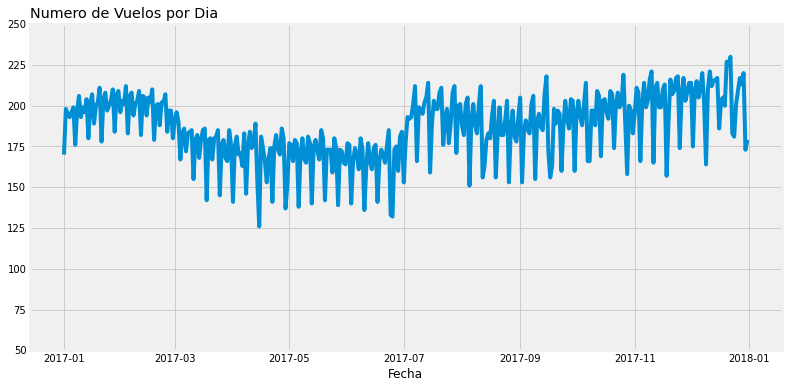

In [12]:
# Let's make sure 'date' is actually a date in pandas
xfecha['fecha'] = xfecha.index
xfecha["fecha"] = pd.to_datetime(xfecha["fecha"])
date = xfecha["fecha"]
value = xfecha["N_Vuelos"]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date, value)
plt.xlabel("Fecha")
plt.title("Numero de Vuelos por Dia", loc = 'left')
plt.ylim(50,250)



1.   Llama la atencion que el 70% de los vuelos estan concetrados en el Grupo Latam y en Sky airline.
2.   La distribucion por dia muestra que, en general, todos los dias tienen practicamente el mismo numero de vuelos. Sin embargo, es algo mayor los dias Jueves, Viernes y Lunes. El dia que registra la menos concetracion son los Sabados.
3. Todos los vuelos tioenen como origen SCEL.
4, Por destino la distribucion es mas homogena. Sin embargo, los tres primncipales destino son SCFA (Antofagasta), SPJC (Peru) y SCCF (Calama) respectivamente. 
4. La totalidad de los vuelos corresponden al 2017. Existen solo dois vuelos para el 2018.
5. Por meses del anio, los vuelos paracen tener una diostribucion homogenea.
Sin embargo los meses que acumalan marginalmente mas vuelos son Diciembre, Enero y Noviembre

Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

1. temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
2. dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
3. atraso_15 : 1 si dif_min > 15, 0 si no.
4. periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .


In [13]:
#Temporada Alta Julio
df['Temporada_Alta'] =  np.where(((df.date >= '2017-07-15') & (df.date <= '2017-07-31')) |
                          ((df.date >= '2017-09-11') & (df.date <= '2017-09-30')) |
                          ((df.date >= '2017-12-15') & (df.date <= '2018-03-03')) , 1, 0)

In [14]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')
df['dif_min'] =(df['Fecha-O']-df['Fecha-I']).dt.total_seconds() / 60
df['atraso_15'] =np.where(df.dif_min > 15,1,0)

In [15]:
df['Hora']=pd.to_datetime(df['Fecha-I']).dt.hour

In [16]:
conditions = [
   (df['Hora'] >= 5) & (df['Hora'] < 12),
   (df['Hora'] >= 12) & (df['Hora'] < 19),
   (df['Hora'] < 5) | (df['Hora'] >=19)
]
choices = ["manana", "tarde", "noche"]

In [17]:
df['periodo_dia'] = np.select(conditions, choices)

In [18]:
df=df.drop(["Hora"], axis=1)
df.to_csv('synthetic_features.csv')

In [50]:
df.tail(20)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,date,Temporada_Alta,dif_min,atraso_15,periodo_dia
68186,2017-12-29 14:20:00,283,SCEL,SCQP,JAT,2017-12-29 14:22:00,283.0,SCEL,SCQP,JAT,29,12,2017,Viernes,N,JetSmart SPA,Santiago,Temuco,2017-12-29,1,2.0,0,tarde
68187,2017-12-31 16:16:00,283,SCEL,SCQP,JAT,2017-12-31 16:18:00,283.0,SCEL,SCQP,JAT,31,12,2017,Domingo,N,JetSmart SPA,Santiago,Temuco,2017-12-31,1,2.0,0,tarde
68188,2017-12-21 04:05:00,301,SCEL,SCCI,JAT,2017-12-21 04:07:00,301.0,SCEL,SCCI,JAT,21,12,2017,Jueves,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-21,1,2.0,0,noche
68189,2017-12-22 04:05:00,301,SCEL,SCCI,JAT,2017-12-22 04:30:00,301.0,SCEL,SCCI,JAT,22,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-22,1,25.0,1,noche
68190,2017-12-26 04:05:00,301,SCEL,SCCI,JAT,2017-12-26 04:05:00,301.0,SCEL,SCCI,JAT,26,12,2017,Martes,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-26,1,0.0,0,noche
68191,2017-12-28 04:05:00,301,SCEL,SCCI,JAT,2017-12-28 04:06:00,301.0,SCEL,SCCI,JAT,28,12,2017,Jueves,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-28,1,1.0,0,noche
68192,2017-12-29 04:05:00,301,SCEL,SCCI,JAT,2017-12-29 04:00:00,301.0,SCEL,SCCI,JAT,29,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-29,1,-5.0,0,noche
68193,2017-12-31 17:00:00,301,SCEL,SCCI,JAT,2017-12-31 17:30:00,301.0,SCEL,SCCI,JAT,31,12,2017,Domingo,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-31,1,30.0,1,tarde
68194,2017-12-18 20:11:00,305,SCEL,SCCI,JAT,2017-12-18 20:21:00,305.0,SCEL,SCCI,JAT,18,12,2017,Lunes,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-18,1,10.0,0,noche
68195,2017-12-23 04:05:00,305,SCEL,SCCI,JAT,2017-12-23 04:01:00,305.0,SCEL,SCCI,JAT,23,12,2017,Sabado,N,JetSmart SPA,Santiago,Punta Arenas,2017-12-23,1,-4.0,0,noche


¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [51]:
#tasa de atraso total
tasa_atraso=100*(sum(df.atraso_15)/len(df.atraso_15))
print(tasa_atraso)

18.493974137172682


In [52]:
atrasoxciia = df.groupby(['OPERA']).agg({'atraso_15': ['sum', 'count']})
atrasoxciia = atrasoxciia.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxciia = atrasoxciia.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxciia.columns = atrasoxciia.columns.droplevel()
atrasoxciia["Tasa de Atraso"] = 100*(atrasoxciia['Vuelos Atrasados']/atrasoxciia['Vuelos Totales'])
atrasoxciia.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxciia)

                          Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
OPERA                                                                     
Plus Ultra Lineas Aereas                30              49       61.224490
Qantas Airways                         113             195       57.948718
Air Canada                             258             565       45.663717
Latin American Wings                   681            1674       40.681004
Gol Trans                              287             806       35.607940
Avianca                                306            1152       26.562500
Aerolineas Argentinas                  468            1949       24.012314
Austral                                 15              74       20.270270
JetSmart SPA                           196            1095       17.899543
Grupo LATAM                           7306           40892       17.866575
Sky Airline                           2540           14298       17.764722
Oceanair Linhas Aereas   

In [53]:
atrasoxdes = df.groupby(['Des-O']).agg({'atraso_15': ['sum', 'count']})
atrasoxdes = atrasoxdes.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxdes = atrasoxdes.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxdes.columns = atrasoxdes.columns.droplevel()
atrasoxdes["Tasa de Atraso"] = 100*(atrasoxdes['Vuelos Atrasados']/atrasoxdes['Vuelos Totales'])
atrasoxdes.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxdes)

       Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
Des-O                                                  
EGYP                  1               1      100.000000
SLCB                  1               1      100.000000
SEQM                  2               2      100.000000
SAWH                  4               6       66.666667
YSSY                113             194       58.247423
YMML                 21              39       53.846154
SAZS                  1               2       50.000000
SAAR                 54             136       39.705882
NZAA                135             361       37.396122
MDPC                 18              54       33.333333
CYYZ                 89             283       31.448763
SACO                308            1023       30.107527
SGAS                 66             232       28.448276
SBGL                405            1435       28.222997
SAME                443            1625       27.261538
SABE                827            3094       26

In [54]:
atrasoxmes = df.groupby(['MES']).agg({'atraso_15': ['sum', 'count']})
atrasoxmes = atrasoxmes.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxmes = atrasoxmes.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxmes.columns = atrasoxmes.columns.droplevel()
atrasoxmes["Tasa de Atraso"] = 100*(atrasoxmes['Vuelos Atrasados']/atrasoxmes['Vuelos Totales'])
atrasoxmes.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxmes)

     Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
MES                                                  
7                1758            5992       29.339119
12               1615            6356       25.409062
10               1363            6032       22.596154
11               1199            6080       19.720395
8                 996            5744       17.339833
9                 967            5610       17.237077
6                 852            4981       17.104999
1                 978            6108       16.011788
5                 827            5240       15.782443
2                 843            5561       15.159144
4                 585            5020       11.653386
3                 631            5482       11.510398


In [55]:
atrasoxdia = df.groupby(['DIANOM']).agg({'atraso_15': ['sum', 'count']})
atrasoxdia = atrasoxdia.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxdia = atrasoxdia.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxdia.columns = atrasoxdia.columns.droplevel()
atrasoxdia["Tasa de Atraso"] = 100*(atrasoxdia['Vuelos Atrasados']/atrasoxdia['Vuelos Totales'])
atrasoxdia.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxdia)

           Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
DIANOM                                                     
Viernes                2285           10292       22.201710
Lunes                  2048           10131       20.215181
Jueves                 2045           10251       19.949273
Miercoles              1661            9722       17.084962
Martes                 1634            9662       16.911613
Sabado                 1363            8352       16.319444
Domingo                1578            9796       16.108616


In [56]:
atrasoxtemporada = df.groupby(['Temporada_Alta']).agg({'atraso_15': ['sum', 'count']})
atrasoxtemporada = atrasoxtemporada.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atrasoxtemporada = atrasoxtemporada.rename({'count': 'Vuelos Totales'}, axis=1)
atrasoxtemporada.columns = atrasoxtemporada.columns.droplevel()
atrasoxtemporada["Tasa de Atraso"] = 100*(atrasoxtemporada['Vuelos Atrasados']/atrasoxtemporada['Vuelos Totales'])
atrasoxtemporada.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atrasoxtemporada)

                Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
Temporada_Alta                                                  
1                           2563           10516       24.372385
0                          10051           57690       17.422430


In [57]:
atraso_tipo_vuelo = df.groupby(['TIPOVUELO']).agg({'atraso_15': ['sum', 'count']})
atraso_tipo_vuelo = atraso_tipo_vuelo.rename({'sum': 'Vuelos Atrasados'}, axis=1)
atraso_tipo_vuelo = atraso_tipo_vuelo.rename({'count': 'Vuelos Totales'}, axis=1)
atraso_tipo_vuelo.columns = atraso_tipo_vuelo.columns.droplevel()
atraso_tipo_vuelo["Tasa de Atraso"] = 100*(atraso_tipo_vuelo['Vuelos Atrasados']/atraso_tipo_vuelo['Vuelos Totales'])
atraso_tipo_vuelo.sort_values(by=['Tasa de Atraso'], inplace=True , ascending=False)
print(atraso_tipo_vuelo)

           Vuelos Atrasados  Vuelos Totales  Tasa de Atraso
TIPOVUELO                                                  
I                      7048           31240       22.560819
N                      5566           36966       15.057079


##4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [58]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [127]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,date,Temporada_Alta,dif_min,atraso_15,periodo_dia
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-22,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,2017-12-25,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,2017-12-27,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,2017-12-29,1,13.0,0,tarde
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima,2017-12-31,1,9.0,0,tarde


In [124]:
#dataset con variables relevantes solamente
df2 = df.drop(["Fecha-I", "Vlo-I", "Ori-I",
               "Des-I", "Emp-I", "Fecha-O",
               "Vlo-I", "Ori-O", "Des-O", 
               "Emp-O","SIGLAORI", "Vlo-O", "date", 'dif_min'], axis=1)

In [66]:
df2.tail(20)

,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,Temporada_Alta,atraso_15,periodo_dia
68186,29,12,2017,Viernes,N,JetSmart SPA,Temuco,1,0,tarde
68187,31,12,2017,Domingo,N,JetSmart SPA,Temuco,1,0,tarde
68188,21,12,2017,Jueves,N,JetSmart SPA,Punta Arenas,1,0,noche
68189,22,12,2017,Viernes,N,JetSmart SPA,Punta Arenas,1,1,noche
68190,26,12,2017,Martes,N,JetSmart SPA,Punta Arenas,1,0,noche
68191,28,12,2017,Jueves,N,JetSmart SPA,Punta Arenas,1,0,noche
68192,29,12,2017,Viernes,N,JetSmart SPA,Punta Arenas,1,0,noche
68193,31,12,2017,Domingo,N,JetSmart SPA,Punta Arenas,1,1,tarde
68194,18,12,2017,Lunes,N,JetSmart SPA,Punta Arenas,1,0,noche
68195,23,12,2017,Sabado,N,JetSmart SPA,Punta Arenas,1,0,noche


In [67]:
df2=pd.get_dummies(df2,columns=['DIANOM', 'TIPOVUELO', 'OPERA','SIGLADES', 'periodo_dia'])

#Entrenando Modelos

In [84]:
X=df2.drop(['atraso_15'], axis=1)
y=df2['atraso_15']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, train_size=0.2)

In [85]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

##Regresion Logistica

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     44548
           1       0.56      0.01      0.03     10017

    accuracy                           0.82     54565
   macro avg       0.69      0.51      0.46     54565
weighted avg       0.77      0.82      0.74     54565



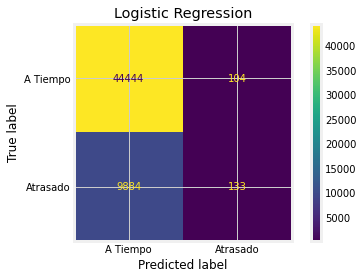

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
model_acc = model.score(X_test, y_test)
print(classification_report(y_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, X_test, y_test)
plt.title("Logistic Regression")
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
print(conf_mat_plot)
del model
del model_pred


##Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     44548
           1       0.29      0.30      0.29     10017

    accuracy                           0.74     54565
   macro avg       0.56      0.57      0.56     54565
weighted avg       0.74      0.74      0.74     54565



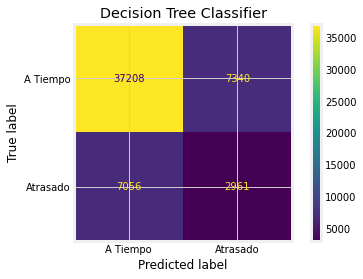

In [109]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
# print(confusion_matrix(y_test, model_pred))
print(classification_report(y_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, X_test, y_test)
plt.title("Decision Tree Classifier")
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
print(conf_mat_plot)
del model
del model_pred

##XGBoost

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     44548
           1       0.59      0.05      0.09     10017

    accuracy                           0.82     54565
   macro avg       0.71      0.52      0.49     54565
weighted avg       0.78      0.82      0.75     54565



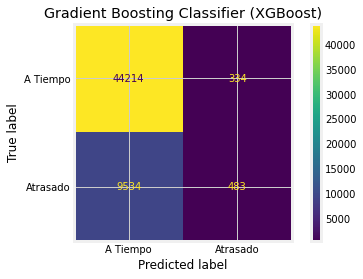

In [108]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
# print(confusion_matrix(y_test, model_pred))
print(classification_report(y_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, X_test, y_test)
plt.title("Gradient Boosting Classifier (XGBoost)")
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
print(conf_mat_plot)
del model
del model_pred

##Random Forest

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     44548
           1       0.37      0.17      0.24     10017

    accuracy                           0.80     54565
   macro avg       0.60      0.55      0.56     54565
weighted avg       0.75      0.80      0.76     54565



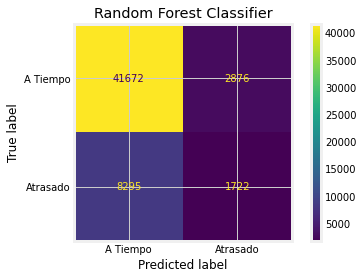

In [107]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, X_test, y_test)
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.title("Random Forest Classifier")
print(conf_mat_plot)
del model
del model_pred

##Extra Trees Classifier

In [152]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
# print(confusion_matrix(y_test, model_pred))
print(classification_report(y_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, X_test, y_test)
plt.xticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.yticks(np.arange(2) , ["A Tiempo", "Atrasado"])
plt.title("Extra Trees Classifier")
print(conf_mat_plot)


ValueError: ignored

In [116]:
perf_df = pd.DataFrame(columns=["Regressors", "MSE", "RMSE", "MAE", "R2"])
def print_metrics(labels_test, model_pred, regressor_name, perf_df):
    
    mse = mean_squared_error(labels_test, model_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels_test, model_pred)
    r2 = r2_score(labels_test, model_pred)
    
    print(f"MSE      : {mse}", end="\n\n")
    print(f"RMSE     : {rmse}", end="\n\n")
    print(f"MAE      : {mae}", end="\n\n")
    print(f"R2 Score : {r2}", end="\n\n")
    
    perf_df = perf_df.append({"Regressors": regressor_name,
                                        "MSE": mse, 
                                        "RMSE": rmse,
                                        "MAE": mae,
                                        "R2": r2}, ignore_index=True)
    return perf_df

In [132]:
df3 = df.drop(["Fecha-I", "Vlo-I", "Ori-I",
               "Des-I", "Emp-I", "Fecha-O",
               "Vlo-I", "Ori-O", "Des-O", 
               "Emp-O","SIGLAORI", "Vlo-O", "date", 'atraso_15'], axis=1)

In [133]:
df3.tail(10)

,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,Temporada_Alta,dif_min,periodo_dia
68196,25,12,2017,Lunes,N,JetSmart SPA,Punta Arenas,1,2.0,noche
68197,30,12,2017,Sabado,N,JetSmart SPA,Punta Arenas,1,-5.0,noche
68198,22,12,2017,Viernes,N,JetSmart SPA,Punta Arenas,1,17.0,tarde
68199,29,12,2017,Viernes,N,JetSmart SPA,Punta Arenas,1,1.0,tarde
68200,20,12,2017,Miercoles,I,JetSmart SPA,Lima,1,16.0,tarde
68201,22,12,2017,Viernes,I,JetSmart SPA,Lima,1,46.0,tarde
68202,25,12,2017,Lunes,I,JetSmart SPA,Lima,1,16.0,tarde
68203,27,12,2017,Miercoles,I,JetSmart SPA,Lima,1,40.0,tarde
68204,29,12,2017,Viernes,I,JetSmart SPA,Lima,1,13.0,tarde
68205,31,12,2017,Domingo,I,JetSmart SPA,Lima,1,9.0,tarde


In [134]:
df3=pd.get_dummies(df3,columns=['DIANOM', 'TIPOVUELO', 'OPERA','SIGLADES', 'periodo_dia'])

In [ ]:
df3.tail(10)

In [135]:
X=df3.drop(['dif_min'], axis=1)
y=df3['dif_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, train_size=0.2)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "LinearRegression", perf_df)
del model
del model_pred

MSE      : 351.2848060571391

RMSE     : 18.742593365304042

MAE      : 11.132118574411894

R2 Score : 0.05937610998533793



In [139]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "DecisionTreeRegressor", perf_df)
del model
del model_pred

MSE      : 616.5998989940642

RMSE     : 24.83142966069542

MAE      : 14.219402852866613

R2 Score : -0.651049477728066



In [142]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "GradientBoostingRegressor", perf_df)
del model
del model_pred

MSE      : 343.4510824578347

RMSE     : 18.532433257881564

MAE      : 10.991812260132264

R2 Score : 0.08035221666066861



In [144]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)
del model
del model_pred

MSE      : 370.900637823174

RMSE     : 19.258780797941856

MAE      : 11.361505188264498

R2 Score : 0.0068514358078850535



In [145]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "ExtraTreesRegressor", perf_df)

MSE      : 446.255387945144

RMSE     : 21.124757701454094

MAE      : 12.309029157885092

R2 Score : -0.1949235256155275



In [146]:
# Set name of the regressors as index labels
perf_df.set_index("Regressors", inplace=True)
perf_df

,MSE,RMSE,MAE,R2
Regressors,,,,
LinearRegression,0.142490,0.377478,0.287740,0.049294
DecisionTreeRegressor,0.264348,0.514148,0.271501,-0.763757
LinearRegression,351.284806,18.742593,11.132119,0.059376
DecisionTreeRegressor,616.599899,24.831430,14.219403,-0.651049
GradientBoostingRegressor,343.451082,18.532433,10.991812,0.080352
RandomForestRegressor,370.900638,19.258781,11.361505,0.006851
ExtraTreesRegressor,446.255388,21.124758,12.309029,-0.194924
